# Part II - Prosper Loan Data Presentation - Varied impacts on borrower interest rates.
## by Thayne Campbell

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Through this presentation, I plan to explore the key factors that effect a borrower's potential interest rate on their loan. These key factors include income range, type of loan, and loan amount. I will also explore the impact of being a Home Owner when it comes to borrowing.

 


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others from 2005 to 2014.

In [1]:
#!pip install -U matplotlib seaborn

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [4]:
#lets change the income range to Categorical so that we can order them correctly.
income_order_dict = {'IncomeRange': ['Not displayed', 'Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for i in income_order_dict:
    income_ordered = pd.api.types.CategoricalDtype(ordered=True, categories = income_order_dict[i])
    
    loans[i] = loans[i].astype(income_ordered)

In [5]:
#function for my box plots
def myBoxPlot(df, xVar , yVar, hue=None, color = 0, palette=None, order=None, hue_order=None, title=''):
    #creating placeholder variables for the x and y values so I can use this function to plot future boxplots
    plt.figure(figsize=[14,6])
    sns.boxplot(data=df, x=xVar, y=yVar, hue=hue, color=sns.color_palette()[color], palette=palette, order=order,hue_order=hue_order);
    #clean up variable names for clarity
    xVar=xVar.replace('_'," ")
    yVar= yVar.replace('_'," ")
    if hue:
        hue=hue.replace("_"," ")
    #add title, x, and y labels    
    plt.title(f'''Distribution of {xVar} by {yVar} {'and' if hue else ''} {hue if hue else ''}{title}'''.title(), fontsize = 14, weight = "bold")
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel(yVar.title(), fontsize = 10, weight = 'bold')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of loan amounts

> The original loan amounts in this data set range from 1000 to about 35,000. Due to the bulk of loans being around the 5000-15,000 range, I transformed the data to a log scale to get a better look at the distribution, revealing a *somewhat* bimodal distribution.



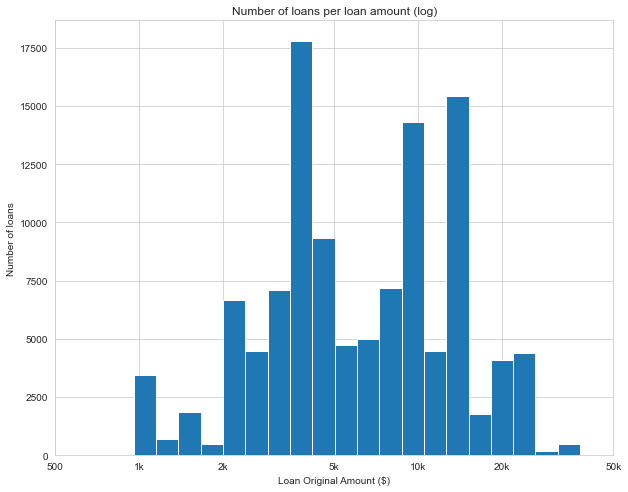

In [6]:
log_binsize = 0.08
bins = 10 ** np.arange(2.5, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10,8])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins );
plt.xscale('log')
#set the x ticks to account for the new log scaling
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500,'1k', '2k', '5k', '10k', '20k','50k'])
plt.xlim(500,5e4)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of loans');
plt.title('Number of loans per loan amount (log)');

## Distribution of loans based on income range

> The bulk of loans taken out were by borrowers who fell into the 25K-75K dollar income range, with over 60,000 loans taken out. The 75K+ income ranges account for just over half of that amount.

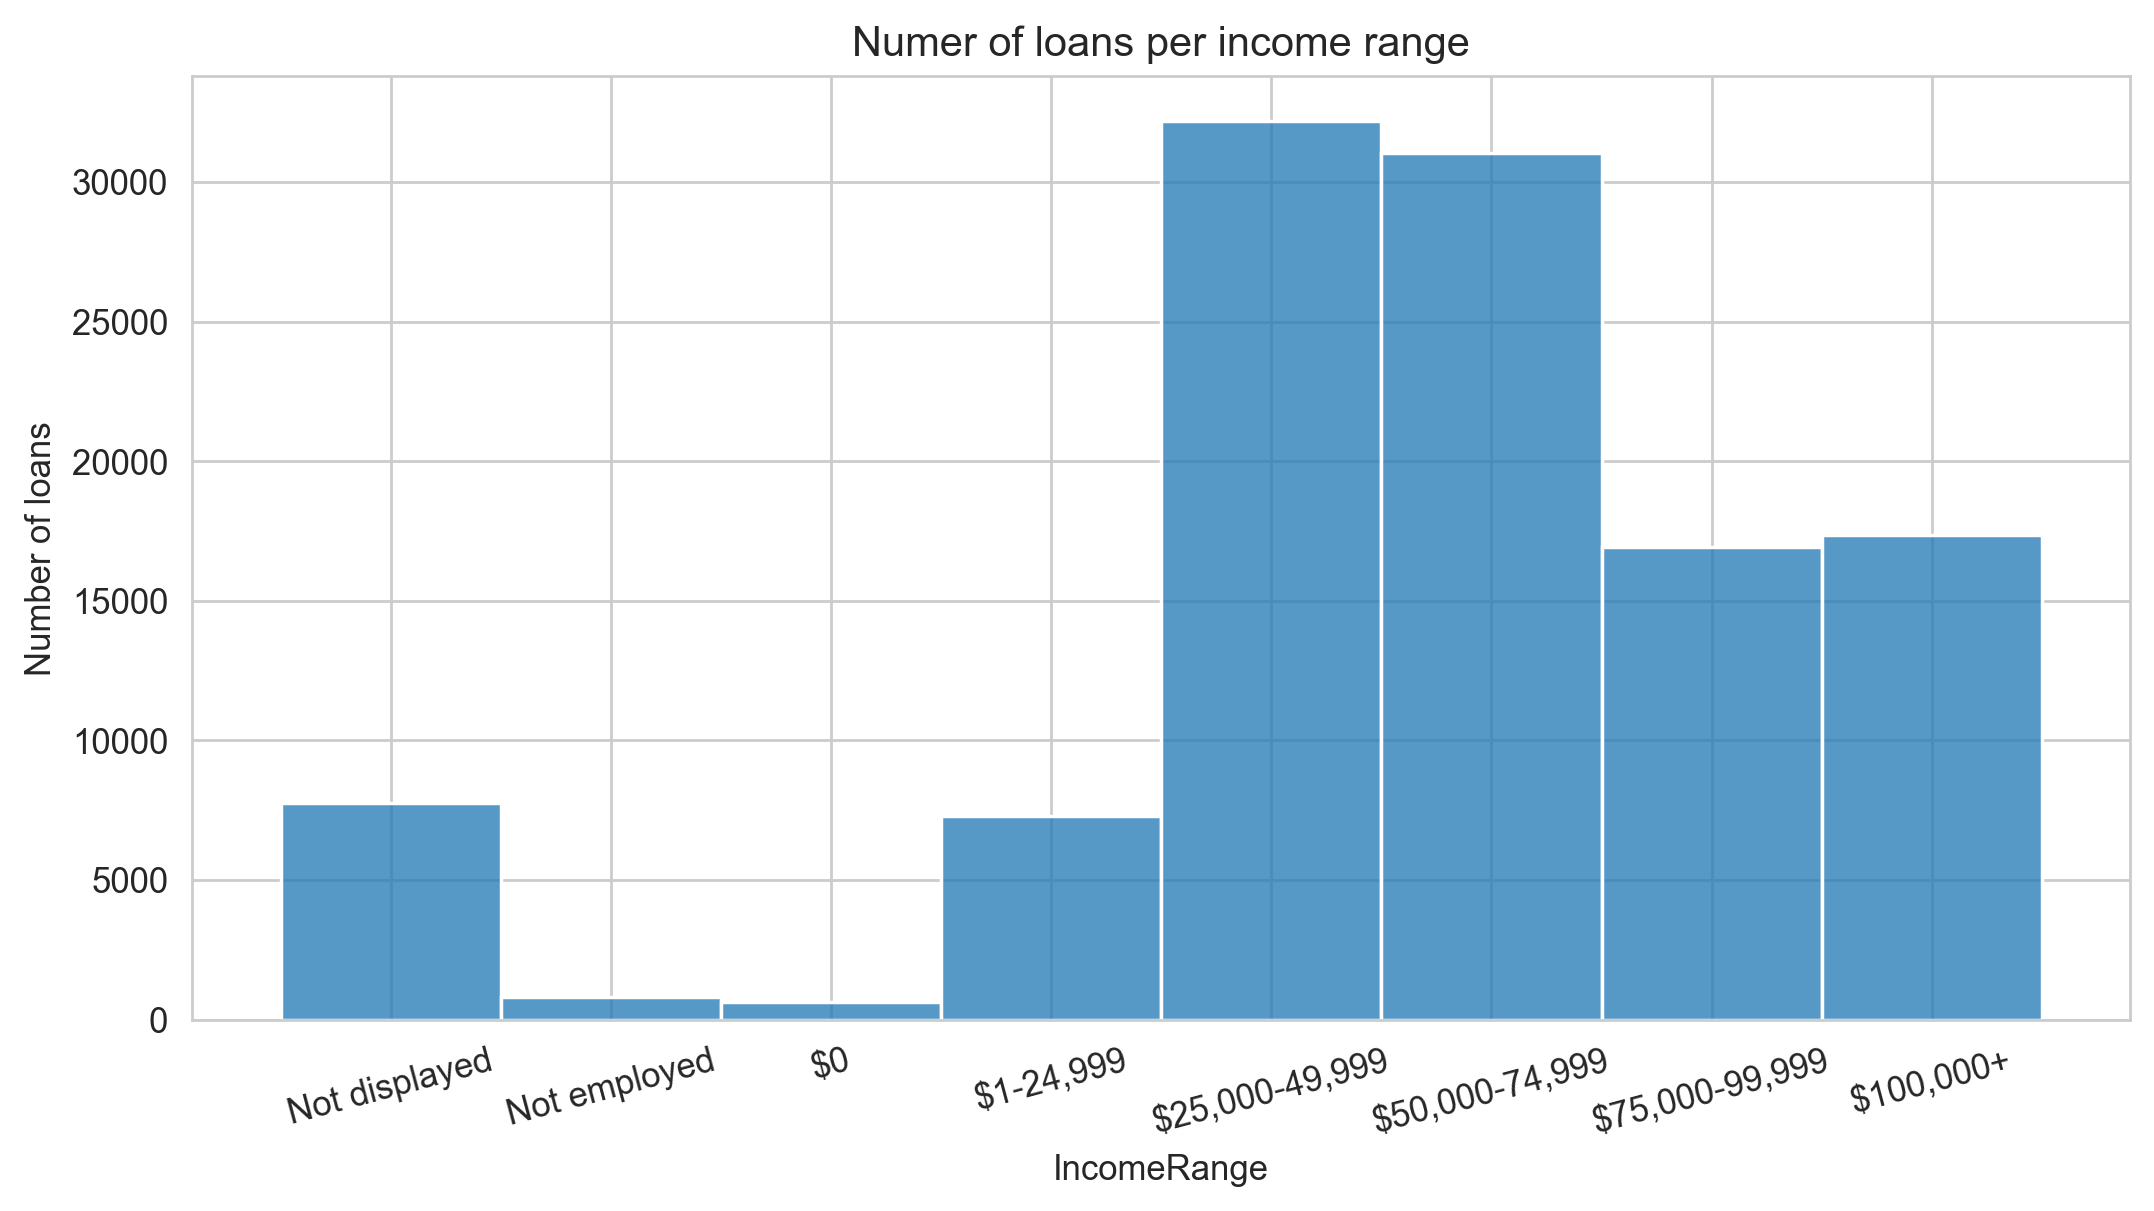

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
sns.histplot(data=loans['IncomeRange'], ax=axes);
#rotate the x axis labels to avoid overlap
plt.xticks(rotation = 15);
plt.ylabel('Number of loans');
plt.title('Numer of loans per income range');

## Relationship between interest rates and loan amounts

> Next, I wanted to explore the correlation between interest rates and loan amounts. Here we can see a negative correlation between the two, showing that higher dollar loan amounts typically will incur lower interest rates.

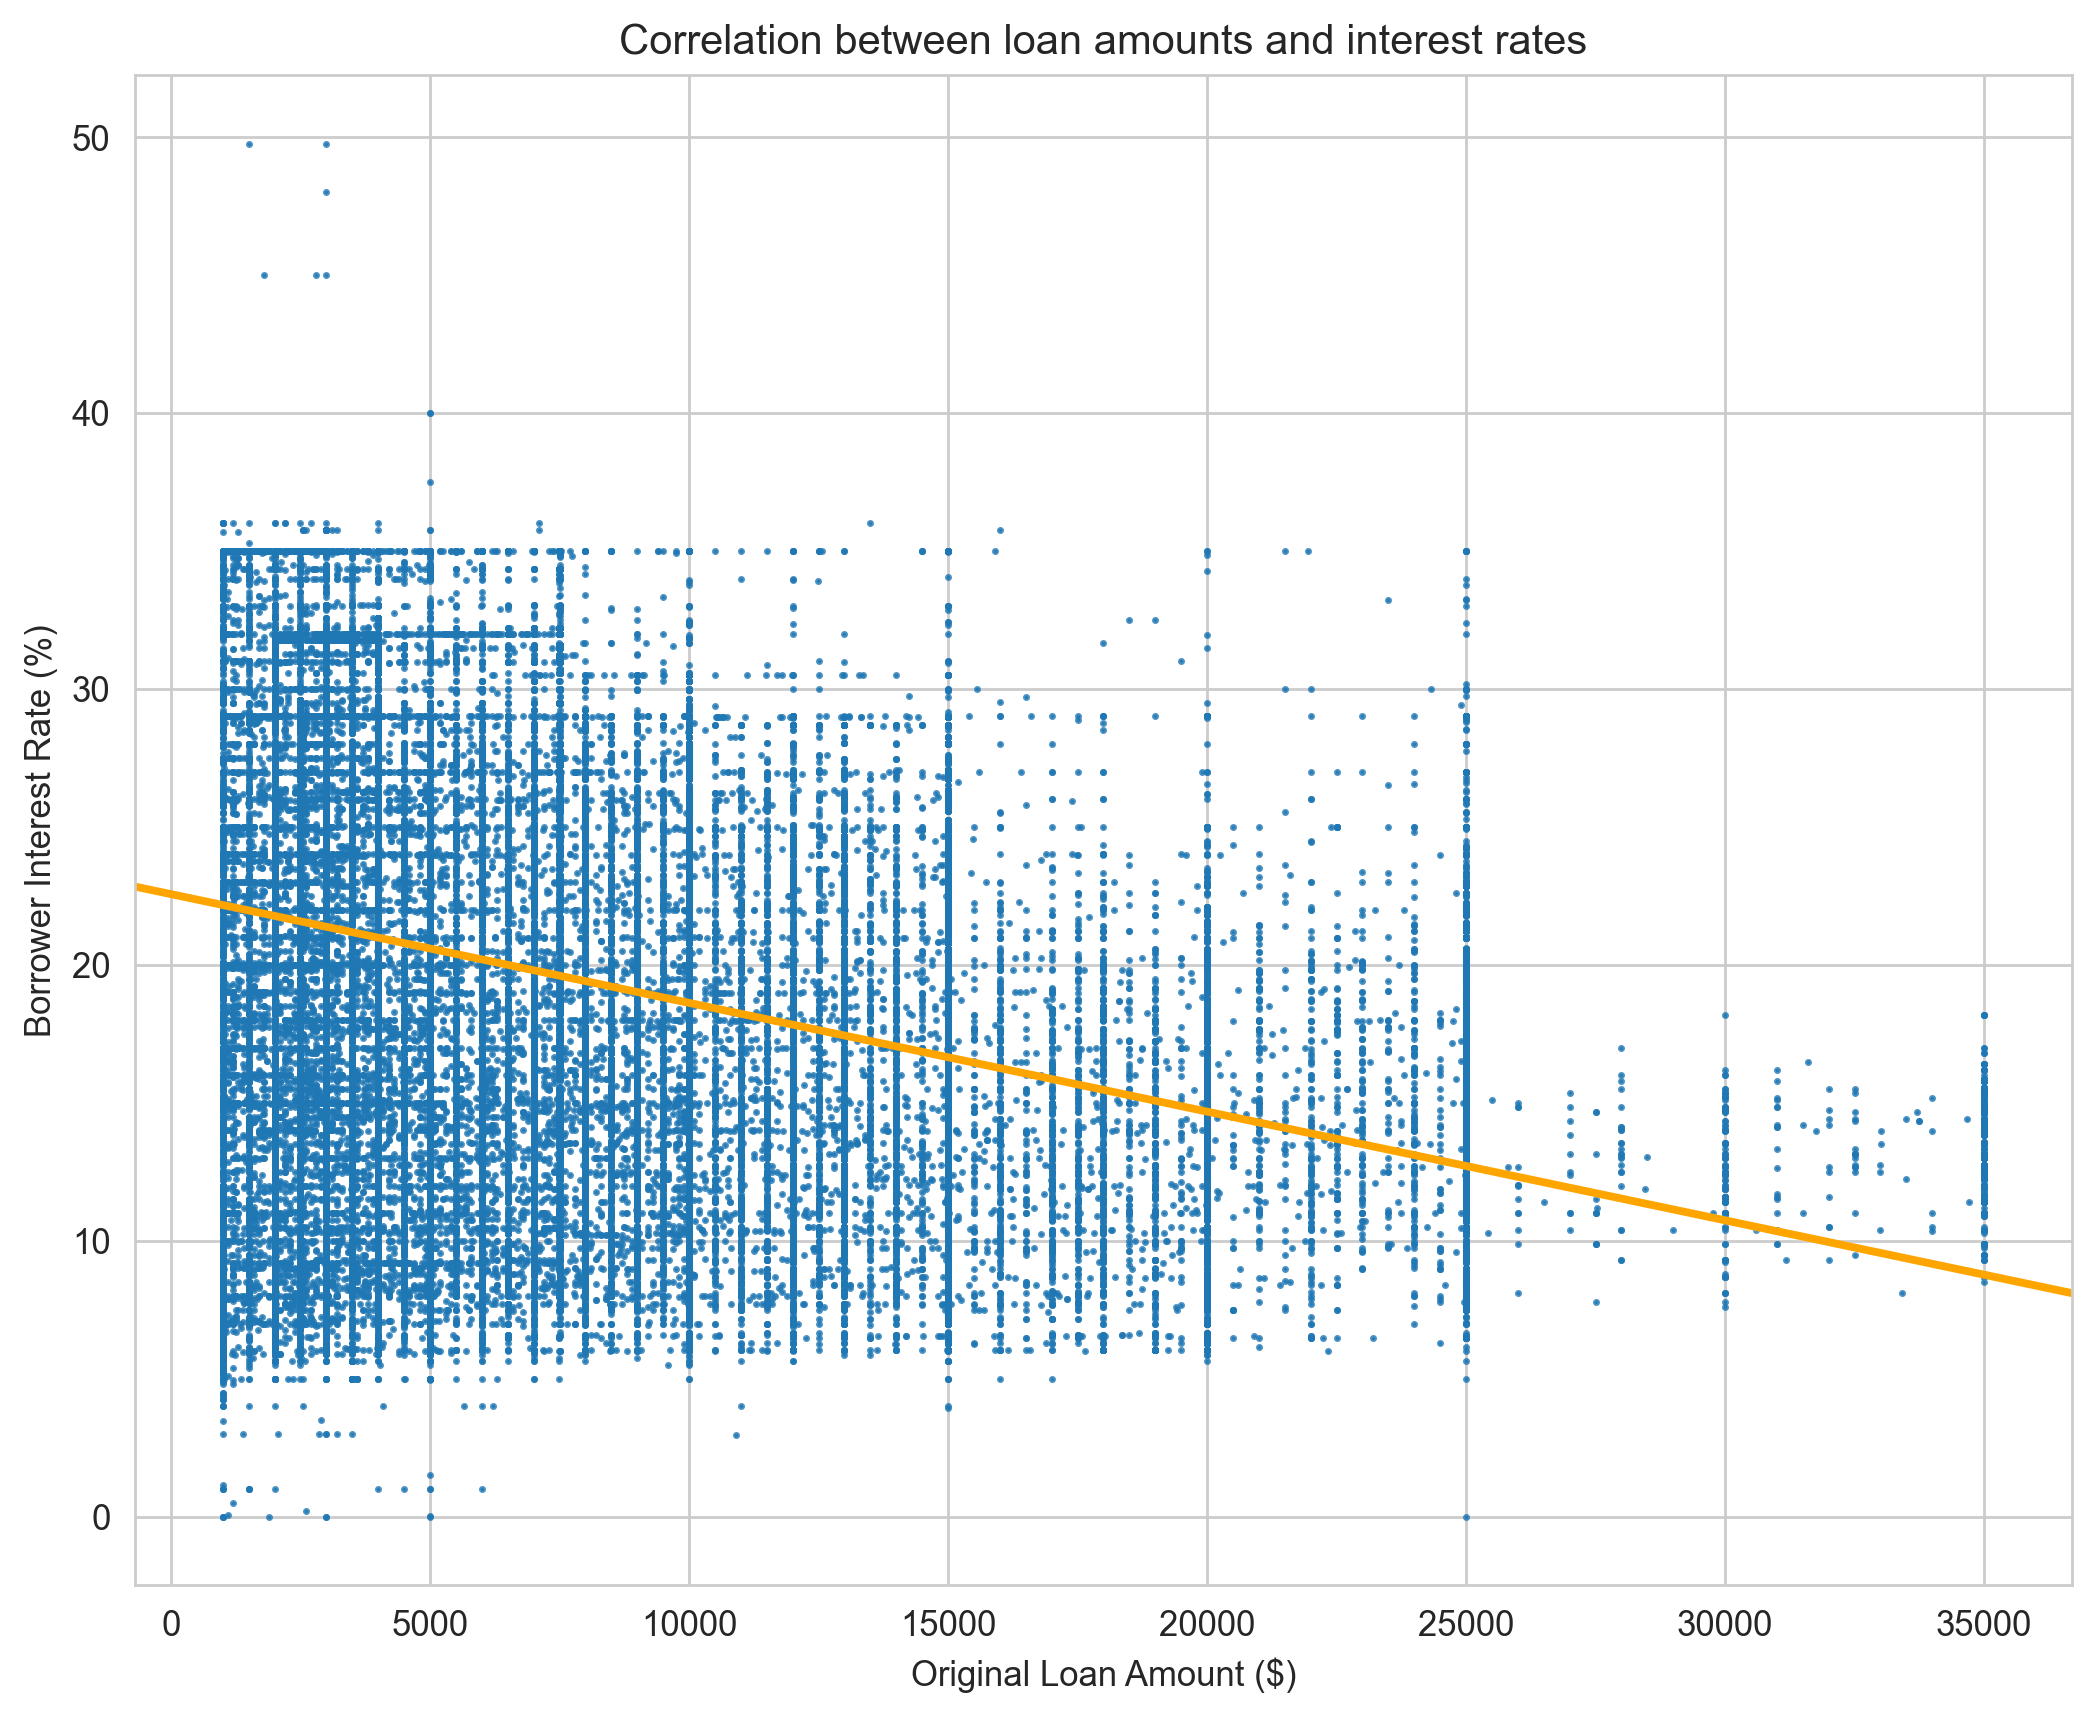

In [8]:
loans['interest_perc'] = loans['BorrowerRate']*100
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
#plot a scatter plot with a trend line to show correlation. Adjust jitter and transparency of points for more clarity.
sns.regplot(data=loans, x='LoanOriginalAmount', y='interest_perc', truncate=False,x_jitter = 0.3, scatter_kws={'s':1}, line_kws={'color':'orange'} )
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Borrower Interest Rate (%)');
plt.title('Correlation between loan amounts and interest rates');

# Interest rate VS loan type

> Here we see that the type of loan on it's own doesn't seem to have too large an effect on interest rates, with the median interest rate between all loan types hovering around the 20% mark. There are a few outliers unter the "Not available" loan type, however further insight into these loans is not available in this dataset

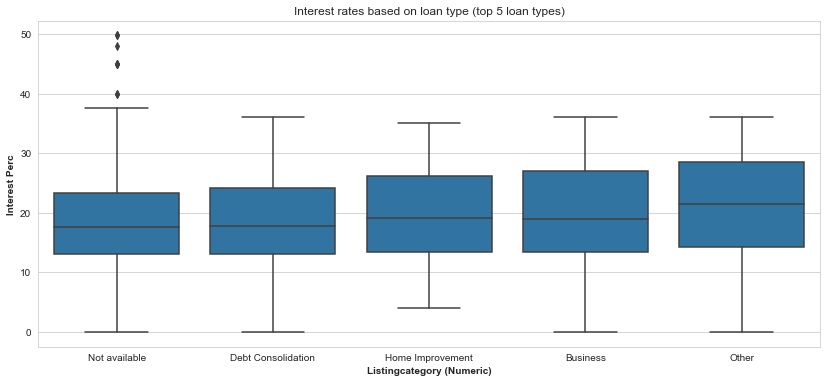

In [9]:
top_loans = loans[(loans['ListingCategory (numeric)']==0) | (loans['ListingCategory (numeric)']==1) | (loans['ListingCategory (numeric)']==2) | (loans['ListingCategory (numeric)'] == 3) | (loans['ListingCategory (numeric)'] == 7)]
#use my previously created function to call a boxplot
myBoxPlot(top_loans, 'ListingCategory (numeric)', 'interest_perc');
my_labels = ['Not available','Debt Consolidation','Home Improvement','Business','Other']
plt.xticks(ticks=[0,1,2,3,4],labels = my_labels);
plt.title('Interest rates based on loan type (top 5 loan types)');

## Interest rates based on loan type & income range

> Now we get a clearer picture of the relationship between income ranges, loan types, and interest rates. There are two things that stick out to me here; namely the outliers. It looks like, while borrowers who are not employed usually see a higher interest rate (between roughly 21% and 32%), there are some exceptions in the outliers that come in at a much lower interest rate (between roughly 4% and 14%). 

>Contrarily, borrowers in the 100k+ income range, while mostly enjoying much lower interest rates when compared to the other income ranges, see a number of outliers ranging between 33%-37%, specifically in the debt consolidation loan type. 

>Another thing worth noting is that it seems as though debt consolidation loans almost always have a lower interest rate applied to them when compared to business and home improvement loans. It's interesting to see how the interest rates for home improvement loans start to creep below the rates of business loans as you move up through the income ranges. 

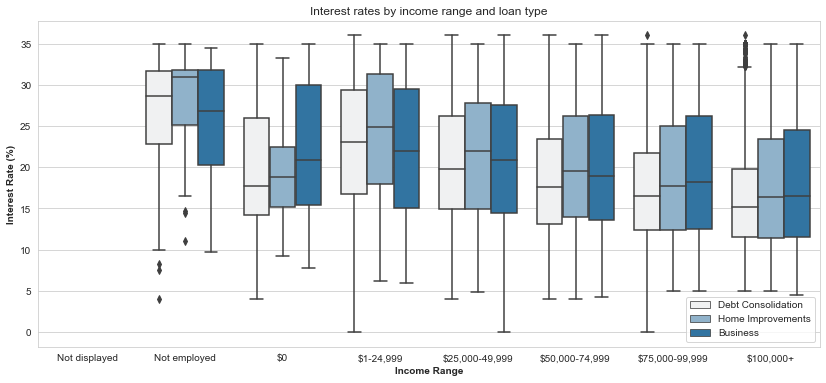

In [10]:
# This time I don't want to include the loan types of 'Not available' or 'Other', so I'll take those out of the hue order.
myBoxPlot(loans, 'IncomeRange', 'interest_perc', hue= 'ListingCategory (numeric)', hue_order = [1,2,3])
#I need to create a new list of labels to account for the adjustment to my hue order.
new_labels = ['Debt Consolidation', 'Home Improvements', 'Business']
plt.legend(labels = new_labels);
plt.xlabel('Income Range');
plt.ylabel('Interest Rate (%)')
plt.title('Interest rates by income range and loan type');

## Home Ownership - does it count for anything?

> Having a look at the relationship between borrower interest rates and loan amounts as we did before, but with the distinction of home ownership, we can see that before the 15k loan amount, there doesn't seem to be much of a distinguishable difference in interest rates. We can see that as the loan about rises above 15k, we do see lower interest rates, but we also see fewer loans given to those who are not home owners.

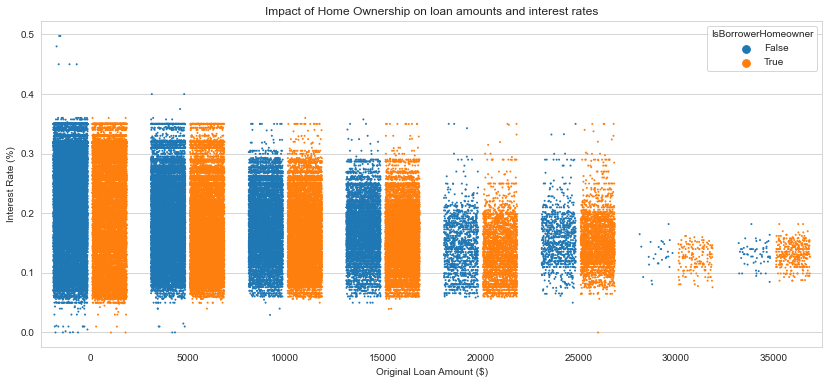

In [11]:
plt.figure(figsize=(14,6))

#create intervals for x axis using floor division
data=loans.dropna(subset=['LoanOriginalAmount']).copy()
data['LoanOriginalAmount_int']=((data['LoanOriginalAmount']//5000)*5000).astype(int)

sns.stripplot(data=data, x='LoanOriginalAmount_int', y='BorrowerRate', hue='IsBorrowerHomeowner', order=None, size=2, jitter=0.35, dodge=True);
plt.title('Impact of Home Ownership on loan amounts and interest rates');
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Interest Rate (%)');

## Loan amounts based on home ownership

> I wanted to get an even closer look into the details of home ownership and it's implications towards loans granted. Here we get a bit of a better picture of how home ownership is related to loan amounts. Consistently, home owners tend to take out larger loans than those who do not own a home. One thing to note here is the big difference in the 0 income range. Homeowners here seem to enjoy a much larger loan amount against the non-home owner. There is also a noticeable difference in the 100K income range in favor of home owners. This reveals a stronger relationship than we've previously seen.

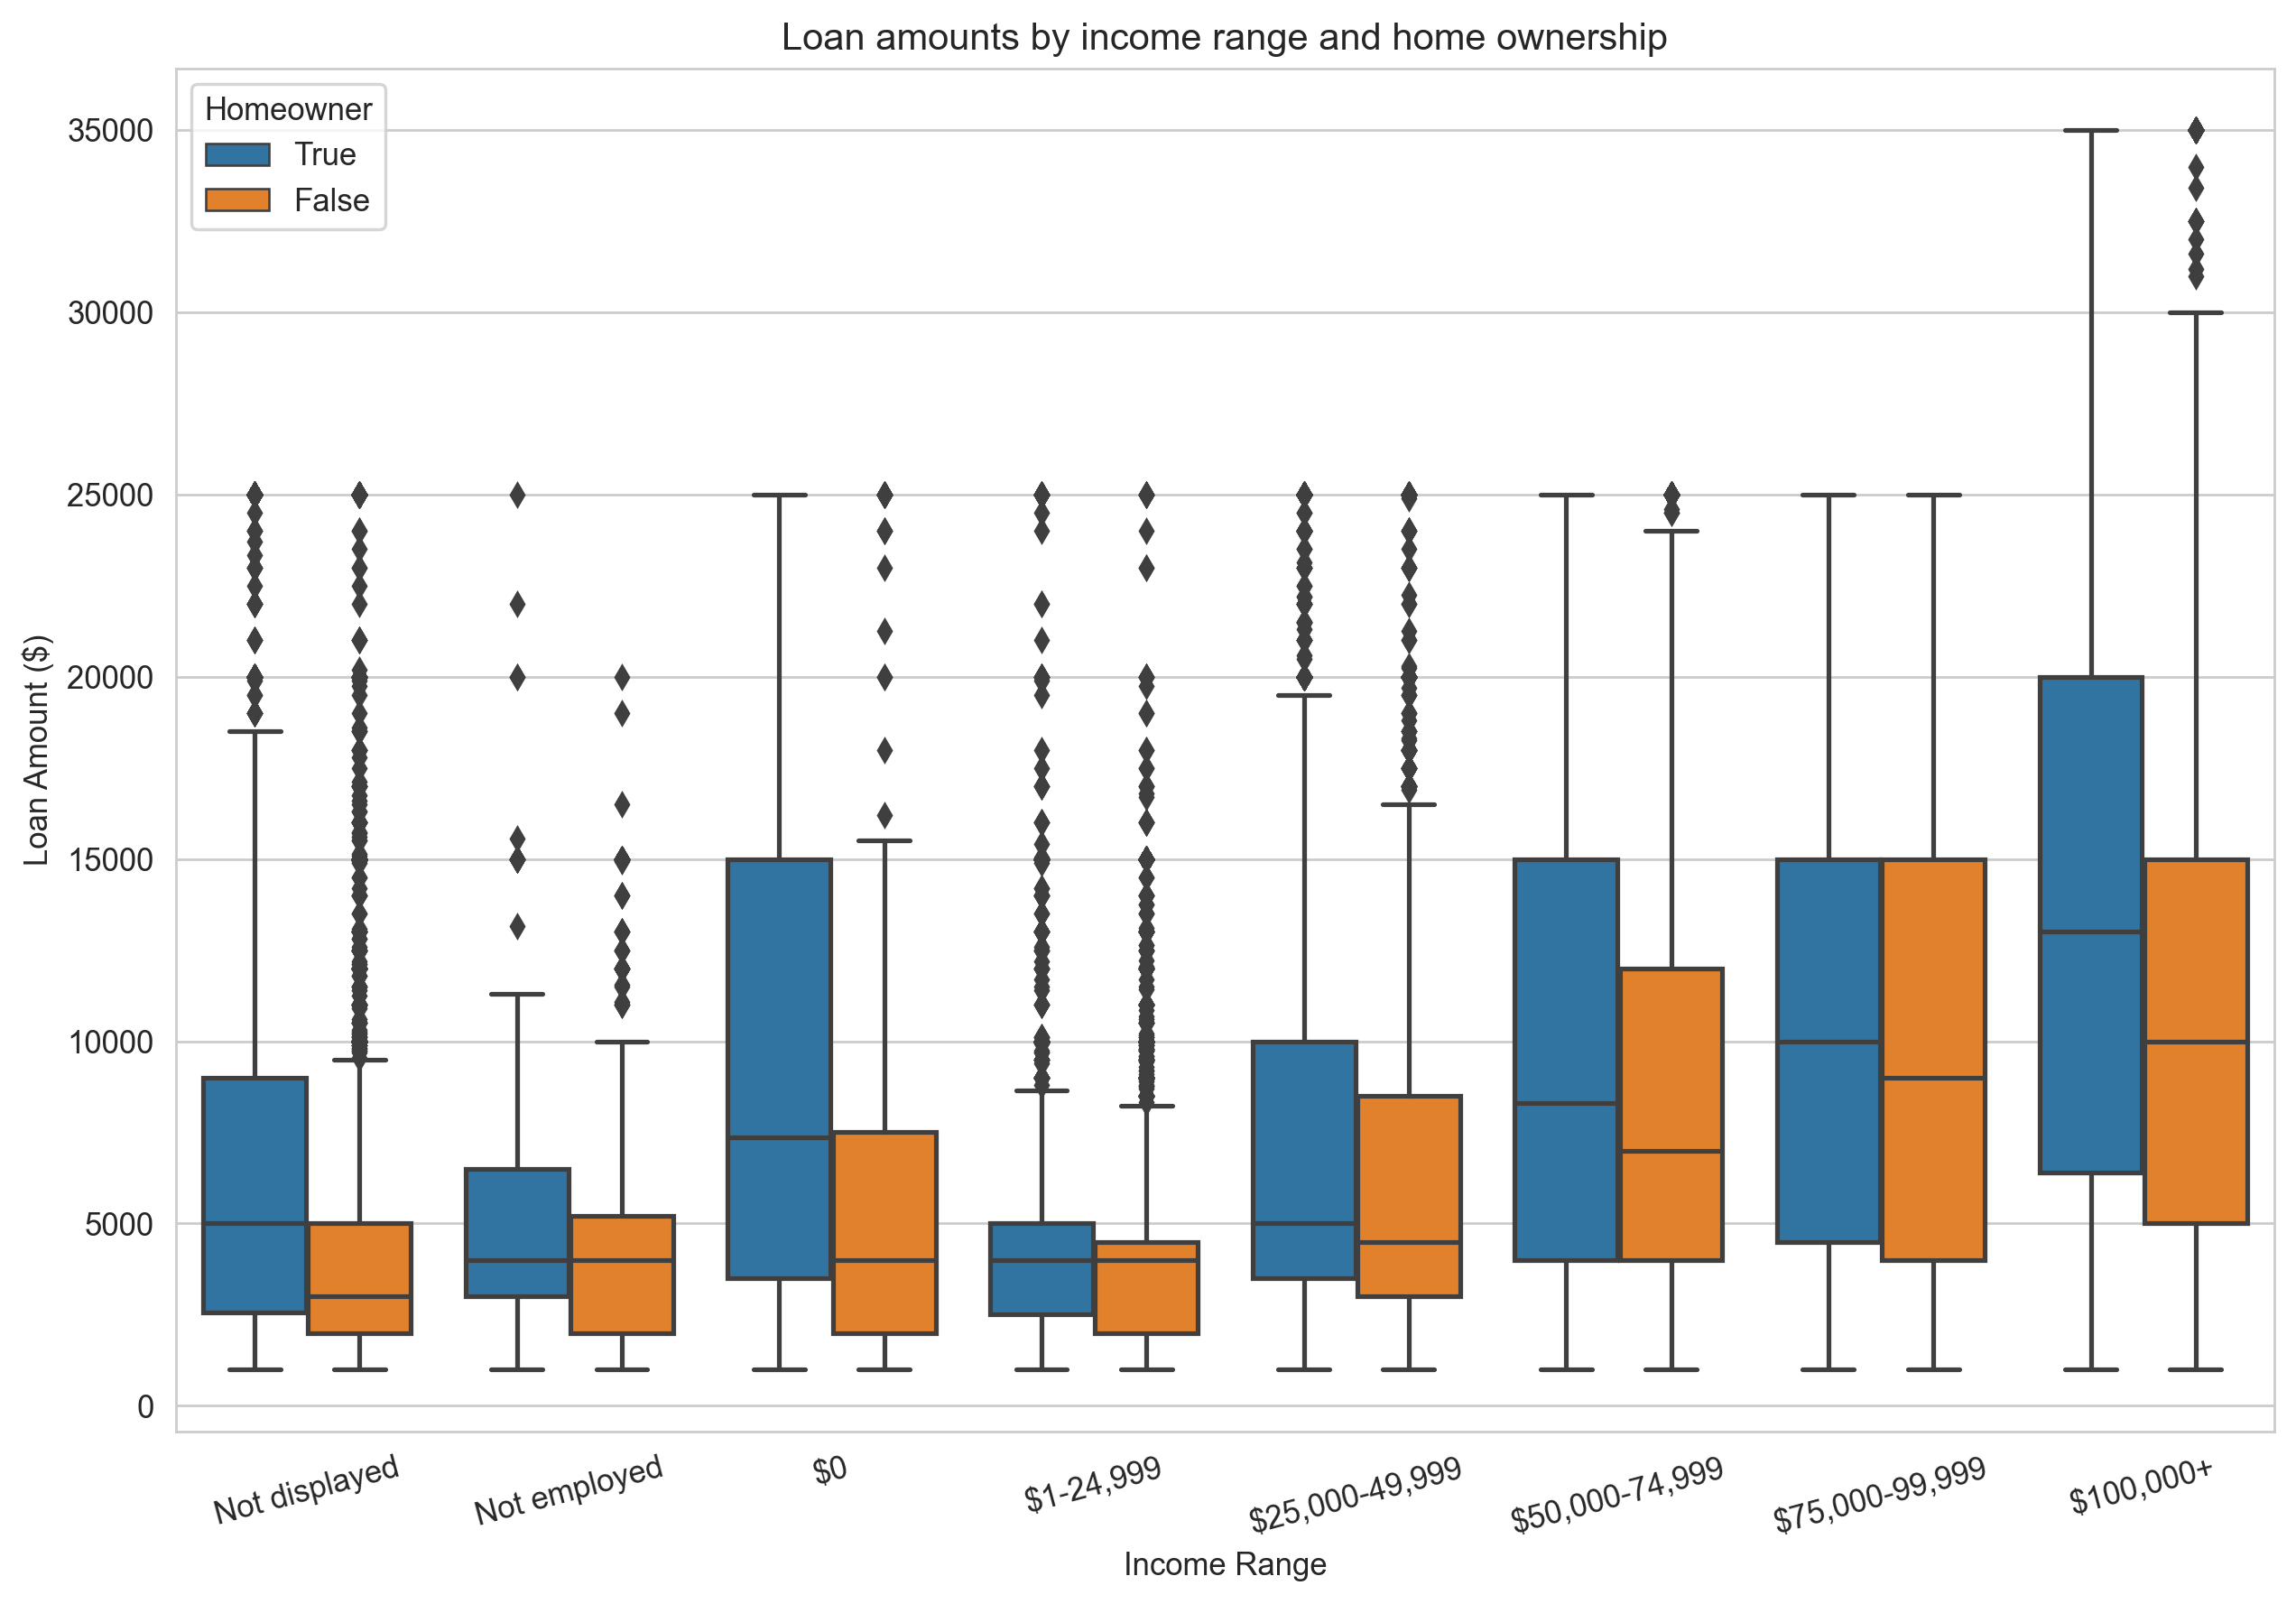

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8),dpi=250)
sns.boxplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', hue_order = [True, False]);
plt.xticks(rotation=15);
plt.legend(title = 'Homeowner')
plt.xlabel('Income Range');
plt.ylabel('Loan Amount ($)')
plt.title('Loan amounts by income range and home ownership');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [28]:
# Use this command if you are running this file in local
!jupyter nbconvert <Prosper_loan_Part2>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Prosper_loan_Part2: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
